In [1]:
from scipy.integrate import RK45

In [2]:
import math
def func(t, x, u):
    u1, u2, u3 = u
    x1, x2, x3, x4, x5, x6, x7, x8 = x
    dx3 = (0.25*u1*math.cos(x1/2)+0.25*u2*math.cos(x2/2)+(u1*(0.26*math.sin(x1)-0.0625*math.sin(x1+x2))+u2*(0.26*math.sin(x2)-0.0625*math.sin(x1+x2)))/math.sqrt(1.2066-0.52*math.cos(x1)-0.52*math.cos(x2)+0.125*math.cos(x1+x2)))
    dx5 = 1/50*(2*dx3*(26-x3)+2*u3*(26-x3)-2*dx3*x4)
    dx6 = (2*u3*x4-((2*dx3*(26-x3)+2*u3*(26-x3)-2*dx3*x4)*(625-(26-x3)**2+2*(26-x3)*x4))/1250)/(2*math.sqrt(x4**2-(625-(26-x3)**2+2*(26-x3)*x4)**2/2500))
    dx7 = (25*dx6*x4*(-4042.5+161.7*x5))/(0+25*x6)**2-(161.7*dx5*x4)/(0+25*x6)-(1*u3*(-4042.5+161.7*x5))/(0+25*x6)
    dx8 = (6.468*dx6*(-30*x5+1*x3*x5+1*x4*x5))/x6**2-(6.468*(-30*dx5+1*dx5*x3+1*dx5*x4+1*dx3*x5+1*u3*x5))/x6

    return np.array([u1, u2, dx3, u3, dx5, dx6, dx7, dx8])

In [3]:
import numpy as np

In [47]:
max_angle = math.pi * 8/9
def get_output(x):
    larm, rarm, takeup, dist, x, y, tl, tr = x
    lout = 0
    rout = 0
    v = 0
    if dist > 20:
        if larm < 2.65:
            lout = 1

        if rarm > 0:
            rout = -1
        if larm >= 2.65 and rarm <= 0:
            v = 1
        else:
            v = 0
    else:
        v = 1

    
    return np.array([lout, rout, v])

def get_start_array(larm, rarm, cable_length, stake_span):
    
    takeup = -0.54+math.sqrt(1.2066-0.52*math.cos(larm)-0.52*math.cos(rarm)+0.125*math.cos(larm+rarm))+0.5*(math.sin(larm/2)+math.sin(rarm/2))
    dist = ((cable_length - takeup)**2 - stake_span**2)/(2 * (cable_length - takeup)) + 0.1
    x = 1/50*(625+2*dist*(26-takeup)-(26-takeup)**2)
    y = math.sqrt(dist**2-(625+2*dist*(26-takeup)-(26-takeup)**2)**2/2500)
    tl = -((1*dist*(-4042.5+161.7*x))/(0.+25*y))
    tr = -((6.468*(-30*x+1*dist*x+1*takeup*x))/y)
    return np.array([larm, rarm, takeup, dist, x, y, tl, tr])
    

In [48]:
sim_time = 50
sim_step_time = 0.02
left_arm_start_angle = 1.3
right_arm_start_angle = 1.3
cable_length = 26
stake_span = 25
max_dist = .5 * (cable_length + stake_span)
start_state = get_start_array(left_arm_start_angle, right_arm_start_angle, cable_length, stake_span)
print(start_state)
integrator = RK45(lambda t, x: func(t, x, get_output(x)), 0, start_state, sim_time, sim_step_time)
time = []

output = np.zeros((0, 8))
for step in range(int(sim_time / sim_step_time)):
    if integrator.y[3] >= max_dist:
        print("Max sim distance hit, exiting")
        print(integrator.y[3])
        break
    try:
        integrator.step()
    except ValueError:
        print("Sim step failed, exiting")
        break
    
    output = np.append(output,[integrator.y],axis= 0)
    time.append(integrator.t)
    


    

[1.30000000e+00 1.30000000e+00 9.71436991e-01 1.28546710e-01
 1.00114252e-01 8.06312177e-02 2.56758668e+02 2.32092329e+02]
Sim step failed, exiting


In [49]:
import matplotlib.pyplot as plt

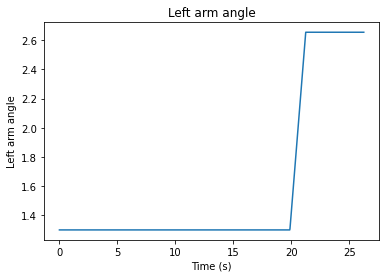

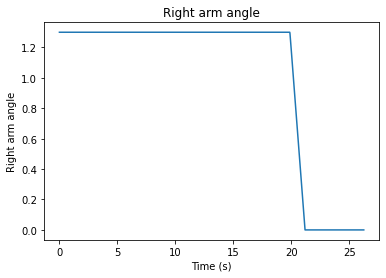

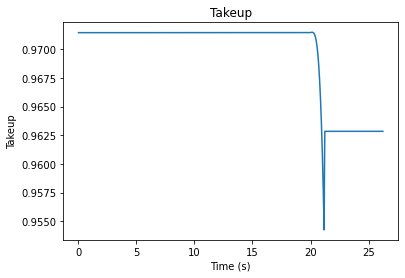

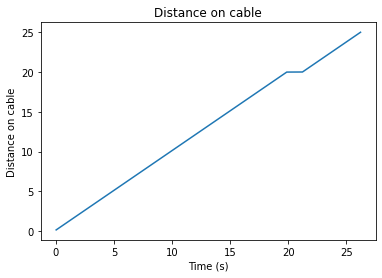

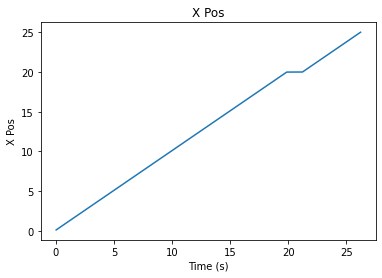

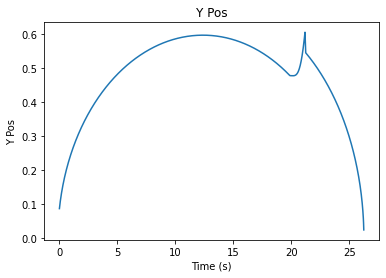

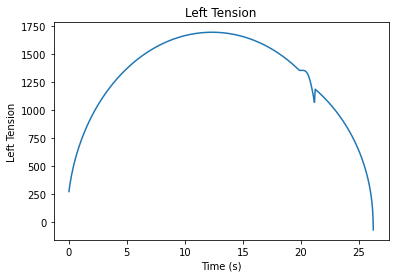

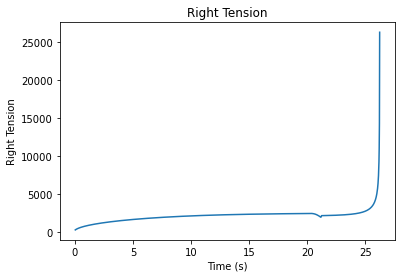

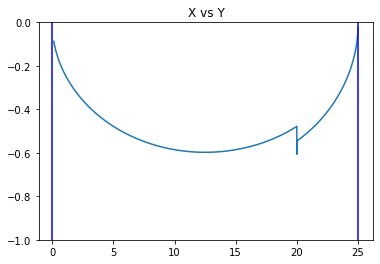

In [50]:
var_list = ["Left arm angle", "Right arm angle", "Takeup", "Distance on cable", "X Pos", "Y Pos", "Left Tension", "Right Tension"]
for state in range(output.shape[1]):
    plt.figure()
    plt.plot(time, output[:, state])
    plt.title(var_list[state])
    plt.xlabel("Time (s)")
    plt.ylabel(f"{var_list[state]}")

plt.figure()
plt.plot(output[:, 4], -1 * output[:, 5])
plt.title("X vs Y")
plt.ylim([-1, 0])
plt.axvline(x = 0, color = 'b')
plt.axvline(x = 25, color = 'b')